In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
data=pd.read_csv('Loan_Amount_prediction.csv')

In [6]:
data.head()

,Serial,PRODUCT,AMOUNT,TYPE,ROI,CHAN,LOWEST,HIGHEST,SCORE,LTV,PRED
0,1,1,1600000,F,14.0,C,3741600.0,3951900.00,699,0.427625,1600000
1,2,1,1600000,F,14.0,C,9836182.8,10012000.49,739,0.162665,1600000
2,3,1,5000000,F,12.0,A,19327000.0,20113500.00,755,0.258705,5000000
3,4,1,2200000,B,12.0,T,3669600.0,3845600.00,721,0.599520,2200000
4,5,1,2950000,F,11.0,A,5900000.0,6160000.00,0,0.500000,2950000


In [88]:
data.describe()

,Serial,PRODUCT,AMOUNT,ROI,LOWEST,HIGHEST,SCORE,LTV,PRED
count,797.000000,797.0,7.970000e+02,796.000000,7.970000e+02,7.970000e+02,797.000000,797.000000,7.970000e+02
mean,399.000000,1.0,4.576564e+06,12.680779,9.415934e+06,1.029609e+07,603.203262,0.473007,3.819922e+06
std,230.218375,0.0,6.701535e+06,1.205863,2.079354e+07,2.192758e+07,289.450330,0.313761,6.381800e+06
min,1.000000,1.0,5.000000e+05,10.500000,1.010160e+06,1.071998e+06,-1.000000,0.000000,0.000000e+00
25%,200.000000,1.0,2.000000e+06,11.500000,3.712800e+06,4.014000e+06,682.000000,0.342017,1.500000e+06
50%,399.000000,1.0,3.000000e+06,12.500000,5.790000e+06,6.420340e+06,737.000000,0.447493,2.400000e+06
75%,598.000000,1.0,5.000000e+06,14.000000,1.026180e+07,1.139600e+07,763.000000,0.562357,4.300000e+06
max,797.000000,1.0,1.500000e+08,18.000000,5.264190e+08,5.433373e+08,819.000000,3.482587,1.500000e+08


In [7]:
data.isnull().sum()

Serial     0
PRODUCT    0
AMOUNT     0
TYPE       0
ROI        1
CHAN       0
LOWEST     0
HIGHEST    0
SCORE      0
LTV        0
PRED       0
dtype: int64

In [8]:
x=data.drop(['Serial','PRED'],axis=1)

In [9]:
y=data[['PRED']]

In [10]:
x.head()

,PRODUCT,AMOUNT,TYPE,ROI,CHAN,LOWEST,HIGHEST,SCORE,LTV
0,1,1600000,F,14.0,C,3741600.0,3951900.00,699,0.427625
1,1,1600000,F,14.0,C,9836182.8,10012000.49,739,0.162665
2,1,5000000,F,12.0,A,19327000.0,20113500.00,755,0.258705
3,1,2200000,B,12.0,T,3669600.0,3845600.00,721,0.599520
4,1,2950000,F,11.0,A,5900000.0,6160000.00,0,0.500000


In [11]:
#Numeric/Continuous Variable
x.describe().columns

Index(['PRODUCT', 'AMOUNT', 'ROI', 'LOWEST', 'HIGHEST', 'SCORE', 'LTV'], dtype='object')

In [12]:
#Categorical Variable 
x.describe(include='object').columns

Index(['TYPE', 'CHAN'], dtype='object')

In [13]:
cont=x.describe().columns
cat=x.describe(include='object').columns

In [14]:
#Handling of Categorical Variable
x=pd.get_dummies(x)

In [15]:
x.head()

,PRODUCT,AMOUNT,ROI,LOWEST,HIGHEST,SCORE,LTV,TYPE_B,TYPE_E,TYPE_F,TYPE_R,CHAN_A,CHAN_C,CHAN_D,CHAN_T
0,1,1600000,14.0,3741600.0,3951900.00,699,0.427625,0,0,1,0,0,1,0,0
1,1,1600000,14.0,9836182.8,10012000.49,739,0.162665,0,0,1,0,0,1,0,0
2,1,5000000,12.0,19327000.0,20113500.00,755,0.258705,0,0,1,0,1,0,0,0
3,1,2200000,12.0,3669600.0,3845600.00,721,0.599520,1,0,0,0,0,0,0,1
4,1,2950000,11.0,5900000.0,6160000.00,0,0.500000,0,0,1,0,1,0,0,0


In [16]:
#Handling of Missing values
x=x.fillna(14)

In [17]:
x.isnull().sum(),y.isnull().sum()

(PRODUCT    0
 AMOUNT     0
 ROI        0
 LOWEST     0
 HIGHEST    0
 SCORE      0
 LTV        0
 TYPE_B     0
 TYPE_E     0
 TYPE_F     0
 TYPE_R     0
 CHAN_A     0
 CHAN_C     0
 CHAN_D     0
 CHAN_T     0
 dtype: int64, PRED    0
 dtype: int64)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


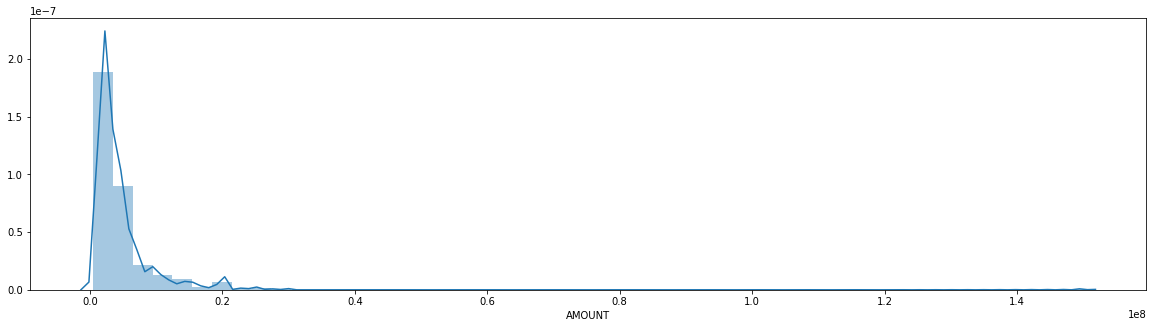

In [79]:
plt.figure(figsize=(20,5))
sns.distplot(x['AMOUNT'])

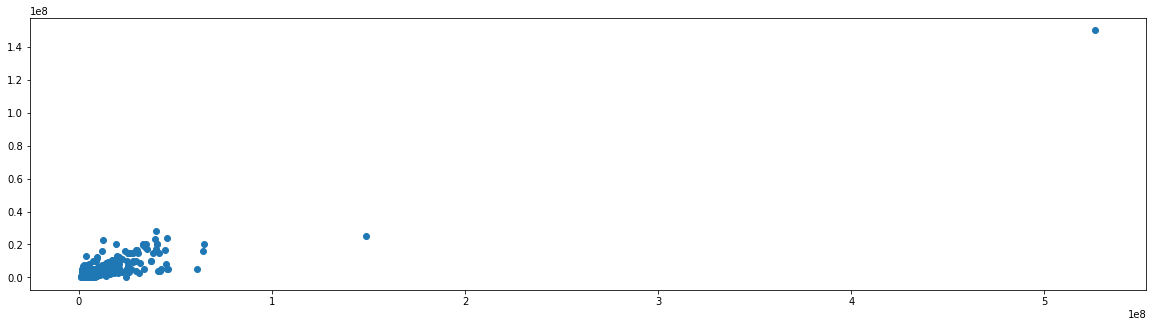

In [86]:
plt.figure(figsize=(20,5))
plt.scatter(data['LOWEST'],data['PRED'])

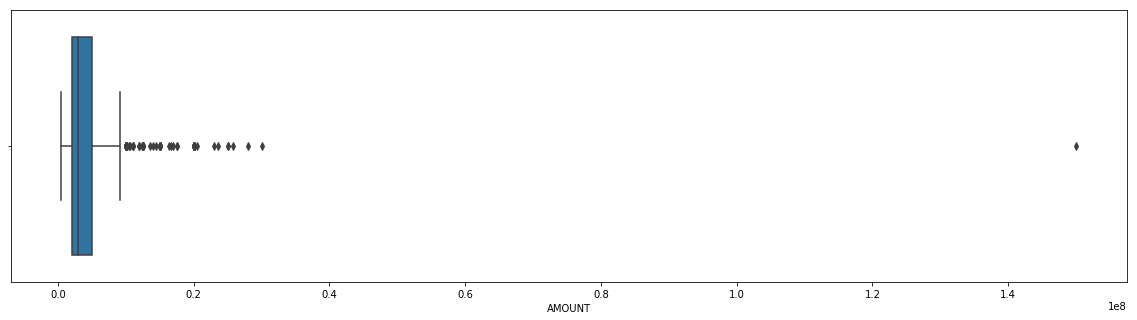

In [18]:
#Checking Outliers in Cont. variable using Box plot
plt.figure(figsize=(20,5))
sns.boxplot(x['AMOUNT'])

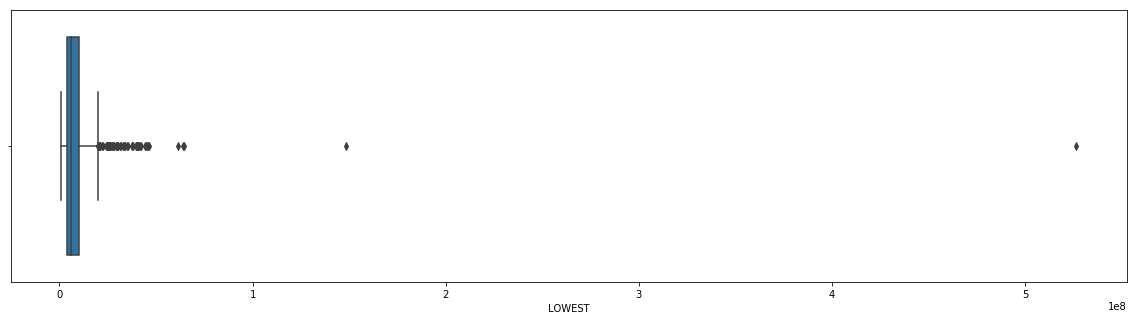

In [19]:
plt.figure(figsize=(20,5))
sns.boxplot(x['LOWEST'])

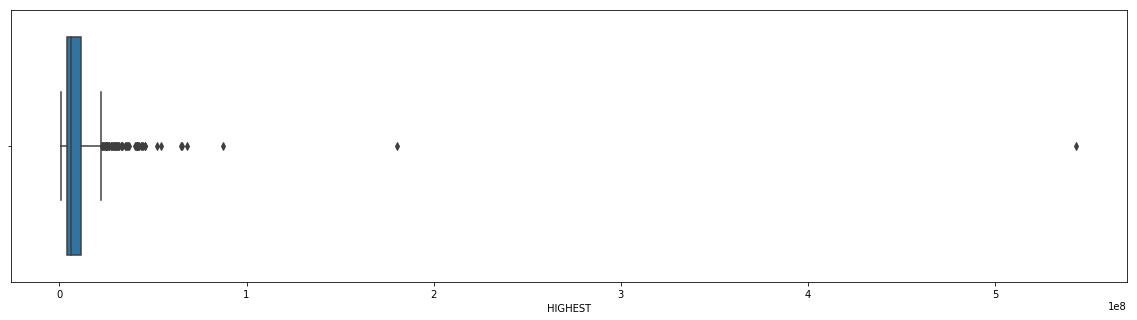

In [20]:
plt.figure(figsize=(20,5))
sns.boxplot(x['HIGHEST'])

In [115]:
data.drop(['Serial','PRODUCT'],axis=1).corr()

,AMOUNT,ROI,LOWEST,HIGHEST,SCORE,LTV,PRED
AMOUNT,1.000000,-0.345318,0.897025,0.897616,-0.063272,0.123568,0.973017
ROI,-0.345318,1.000000,-0.196915,-0.206628,-0.001688,-0.241538,-0.316562
LOWEST,0.897025,-0.196915,1.000000,0.994020,-0.091617,-0.097281,0.918338
HIGHEST,0.897616,-0.206628,0.994020,1.000000,-0.094982,-0.065954,0.916914
SCORE,-0.063272,-0.001688,-0.091617,-0.094982,1.000000,0.038636,-0.069194
LTV,0.123568,-0.241538,-0.097281,-0.065954,0.038636,1.000000,0.132223
PRED,0.973017,-0.316562,0.918338,0.916914,-0.069194,0.132223,1.000000


In [22]:
#Variable Transformation 
#Here we are using Robust scaler because outlier available
from sklearn.preprocessing import RobustScaler
x_scaled=RobustScaler()
x_scaled.fit(x)
x_scaled=x_scaled.transform(x)

In [23]:
x_scaled

array([[ 0.        , -0.46666667,  0.6       , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , -0.46666667,  0.6       , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.66666667, -0.2       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.2       ,  0.02      , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.16666667, -0.6       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.5       , -0.2       , ...,  1.        ,
         0.        ,  0.        ]])

In [24]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=12)

In [61]:
x_train.shape,y_train.shape

((637, 15), (637, 1))

In [63]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
y_pred=model.predict(x_test)

In [65]:
model.score(x_test,y_test)

0.901569632726137

In [66]:
round(pd.DataFrame(y_pred),-4)

,0
0,980000.0
1,3520000.0
2,1990000.0
3,7590000.0
4,3290000.0
5,3100000.0
6,2070000.0
7,1480000.0
8,2060000.0
9,4990000.0


In [67]:
mse = np.mean((model.predict(x_test)-y_test)**2)
mse

PRED    8.708621e+11
dtype: float64

In [68]:
rmse = np.sqrt(mse)
rmse

PRED    933199.912342
dtype: float64

In [69]:
#Train MSE Value
mse_1 = np.mean((model.predict(x_train)-y_train)**2)
mse_1

PRED    1.555678e+12
dtype: float64

In [70]:
#Train RSME Value
rmse_1= np.sqrt(mse_1)
rmse_1

PRED    1.247268e+06
dtype: float64

In [ ]:
RMSE of test > RMSE of train => OVER FITTING of the data.
RMSE of test < RMSE of train => UNDER FITTING of the data.

In [71]:
#Test R2 Score
r2_score(y_pred,y_test)

0.8852245530742776

In [72]:
#Train r2 Score
r2_score(model.predict(x_train),y_train)

0.9669346945117426

In [33]:
model.rank_

12

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mse=mean_squared_error(y_test,y_pred)
mse

870862076394.8982

In [36]:
rmse=np.sqrt(mse)
rmse

933199.912341883

In [37]:
y_test.head(1),pd.DataFrame(y_pred[0]).head()

(       PRED
 216  420000,                0
 0  983787.120752)

In [38]:
import statsmodels.formula.api as smf

In [39]:
m=smf.ols('PRED~Serial+PRODUCT+AMOUNT+TYPE+ROI+CHAN+LOWEST+HIGHEST+SCORE+LTV+PRED',data).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PRED   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.532e+31
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:10:19   Log-Likelihood:                 13377.
No. Observations:                 796   AIC:                        -2.672e+04
Df Residuals:                     781   BIC:                        -2.665e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.054e-09   2.83e-09     -2.143      0.032   -1.16e-08   -5.08e-10
TYPE[T.E]   7.916e-09   8.98e-09      0.881      0.378   -9.72e-09    2.55e-08
TYPE[T.F]   2.037e-10   9.99e-10      0.204      0.838   -1.76e-09    2.16e-09
TYPE[T.R]  -1.863e-09   3.66e-09     -0.509      0.611   -9.04e-09    5.32e-09
CHAN[T.C]    1.31e-09   9.92e-10      1.320      0.187   -6.38e-10    3.26e-09
CHAN[T.D]  -1.444e-08   6.13e-09     -2.354      0.019   -2.65e-08    -2.4e-09
CHAN[T.T]   3.798e-09   1.83e-09      2.070      0.039    1.97e-10     7.4e-09
Serial      1.393e-12   1.95e-12      0.716      0.474   -2.43e-12    5.21e-12
PRODUCT    -3.027e-09   2.83e-09     -1.071      0.284   -8.57e-09    2.52e-09
AMOUNT      8.882e-16   3.03e-16      2.933      0.003    2.94e-16    1.48e-15
ROI         1.164e-10   4.29e-10      0.271      0.786   -7.26e-10    9.59e-10
LOWEST      6.939e-16   2.18e-16      3.177      0.002    2.65e-16    1.12e-15
HIGHEST    -1.596e-16   1.92e-16     -0.830      0.407   -5.37e-16    2.18e-16
SCORE      -1.684e-12   1.54e-12     -1.090      0.276   -4.72e-12    1.35e-12
LTV         1.048e-09   1.82e-09      0.576      0.565   -2.52e-09    4.62e-09
PRED           1.0000   3.68e-16   2.72e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     1784.846   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6838204.673
Skew:                         -19.003   Prob(JB):                         0.00
Kurtosis:                     455.474   Cond. No.                     2.96e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
d=x[['AMOUNT','LOWEST']]

In [41]:
#Variable Transformation 
#Here we are using Robust scaler because outlier available
from sklearn.preprocessing import RobustScaler
x_scaled1=RobustScaler()
x_scaled1.fit(d)
x_scaled1=x_scaled1.transform(d)

In [42]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled1,y,test_size=0.2,random_state=12)

In [43]:
model.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
y_pred1=model.predict(x_test1)

In [45]:
m=smf.ols('PRED~AMOUNT+LOWEST+HIGHEST',data).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PRED   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     5939.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:10:19   Log-Likelihood:                -12361.
No. Observations:                 797   AIC:                         2.473e+04
Df Residuals:                     793   BIC:                         2.475e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.802e+05   5.93e+04     -3.040      0.002   -2.97e+05   -6.39e+04
AMOUNT         0.7287      0.016     45.788      0.000       0.698       0.760
LOWEST         0.0837      0.021      4.043      0.000       0.043       0.124
HIGHEST       -0.0120      0.020     -0.608      0.544      -0.051       0.027
==============================================================================
Omnibus:                      748.874   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49879.947
Skew:                          -4.010   Prob(JB):                         0.00
Kurtosis:                      40.917   Cond. No.                     4.32e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
mse=mean_squared_error(y_test1,y_pred1)
mse

803786469990.1458

In [47]:
rmse=np.sqrt(mse)
rmse

896541.3933501039

In [48]:
mse1= np.mean((model.predict(x_test1)-y_test1)**2)
mse1

PRED    8.037865e+11
dtype: float64

In [49]:
rmse1=np.sqrt(mse1)
rmse1

PRED    896541.39335
dtype: float64

In [50]:
#Test Score
model.score(x_test1,y_test1)

0.9091509441099882

In [56]:
mse2= np.mean((model.predict(x_train1)-y_train1)**2)
mse2

PRED    1.970598e+12
dtype: float64

In [57]:
rmse2=np.sqrt(mse2)
rmse2

PRED    1.403780e+06
dtype: float64

In [58]:
#Train Score
model.score(x_train1,y_train1)

0.9594563114331495

In [51]:
round(pd.DataFrame(y_pred1,index=y_test.index),-4).head()

,0
216,960000.0
381,3350000.0
63,1830000.0
229,7400000.0
467,3400000.0


In [52]:
y_test.head()

,PRED
216,420000
381,4200000
63,2350000
229,9000000
467,3000000


In [53]:
pd.concat([round(pd.DataFrame(y_pred1,index=y_test.index),-4),y_test1],axis=1)

,0,PRED
216,960000.0,420000
381,3350000.0,4200000
63,1830000.0,2350000
229,7400000.0,9000000
467,3400000.0,3000000
658,3630000.0,2400000
431,1860000.0,1970000
483,1010000.0,1436000
298,1580000.0,2100000
772,4720000.0,4440000


In [54]:
from sklearn.metrics import r2_score 

In [55]:
r2_score(y_pred1,y_test1)

0.893088950650717

In [103]:
mean=y_test1.PRED.mean()
mean

3359531.25

In [104]:
#Residual Error
SSE=np.sum((y_test1-y_pred1)**2)
SSR=np.sum((y_pred1-mean)**2)

In [105]:
#R2 Value
SSR/(SSE+SSR)

PRED    0.903666
dtype: float64

In [106]:
#Residual Error
SSE/(SSE+SSR)

PRED    0.096334
dtype: float64